In [1]:
from imports import *

# ACQUIRE

In [2]:
# Acquire data from SQL using module found in wrangle.py
df = wrangle.get_zillow()
# Obtain number of rows and columns for orginal dataframe
df.shape

Reading from csv file...


(77381, 67)

# PREPARE

## PREPARE - SINGLE FAMILY HOMES

In [3]:
def single_family_homes(df):
    # Restrict df to only properties that meet single unit criteria

    #261: Single Family Residential, #262: Rural Residence, #263: Mobile Homes, 
    #264: Townhomes, #265 Cluster Homes, #266: Condominium, #268: Row House, 
    #273 Bungalow, #275 Manufactured, #276 Patio Home, #279 Inferred Single Family Residence

    single_use = [261, 262, 263, 264, 265, 266, 268, 273, 275, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_use)]

    # Restrict df to only those properties with at least 1 bath & bed and > 400 sqft area (to not include tiny homes)
    
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>400)]

    return df

In [4]:
df = single_family_homes(df)

In [5]:
df.shape

(71548, 67)

## PREPARE - MISSING VALUES

In [6]:
def missing_values_per_column(df):
# identifies nulls by column, creates a dataframe to display counts and percent of nulls by column
    missing_in_columns = pd.concat([
        df.isna().sum().rename('count').sort_values(ascending = False),
        df.isna().mean().rename('percent')
    ], axis=1)
    return missing_in_columns


In [7]:
missing_values_per_column(df)

,count,percent
buildingclasstypeid,71548,1.00
buildingclassdesc,71548,1.00
finishedsquarefeet15,71539,1.00
finishedsquarefeet13,71522,1.00
basementsqft,71498,1.00
storydesc,71498,1.00
storytypeid,71498,1.00
yardbuildingsqft26,71479,1.00
finishedsquarefeet6,71392,1.00
fireplaceflag,71376,1.00


In [8]:
def remove_columns(df, cols_to_remove = ['censustractandblock','finishedsquarefeet12','buildingqualitytypeid', 'heatingorsystemtypeid', 'propertyzoningdesc', 'heatingorsystemdesc', 'unitcnt']):
#removes columns that will not be used in the exploration and modeling phases of the pipeline
    df = df.drop(columns=cols_to_remove)
    return df

In [9]:
df = remove_columns(df, cols_to_remove = ['censustractandblock','finishedsquarefeet12','buildingqualitytypeid', 'heatingorsystemtypeid', 'propertyzoningdesc', 'heatingorsystemdesc', 'unitcnt'])
df.head().T

,0,1,2,3,4
parcelid,14297519,17052889,14186244,12177905,10887214
airconditioningtypeid,NaN,NaN,NaN,NaN,1.00
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,3.50,1.00,2.00,3.00,3.00
bedroomcnt,4.00,2.00,3.00,4.00,3.00
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN
calculatedbathnbr,3.50,1.00,2.00,3.00,3.00
decktypeid,NaN,NaN,NaN,NaN,NaN
finishedfloor1squarefeet,NaN,"1,465.00",NaN,NaN,NaN


In [10]:
df.shape

(71548, 60)

In [11]:
missing_values_per_column(df)

,count,percent
buildingclasstypeid,71548,1.00
buildingclassdesc,71548,1.00
finishedsquarefeet15,71539,1.00
finishedsquarefeet13,71522,1.00
basementsqft,71498,1.00
storydesc,71498,1.00
storytypeid,71498,1.00
yardbuildingsqft26,71479,1.00
finishedsquarefeet6,71392,1.00
fireplaceflag,71376,1.00


- Observation:
Willl drop columns with more than 60% missing 

In [12]:
def missing_values_per_row(df):
# identifies nulls by row, creates a dataframe to display counts and percent of nulls by row
    missing_in_rows = pd.concat([
        df.isna().sum(axis=1).rename('n_cols_missing'),
        df.isna().mean(axis=1).rename('percent_missing'),
        ], axis=1).value_counts().to_frame(name='row_counts').sort_index().reset_index()
 
    return missing_in_rows

In [13]:
missing_values_per_row(df)

,n_cols_missing,percent_missing,row_counts
0,19,0.32,2
1,20,0.33,5
2,21,0.35,24
3,22,0.37,98
4,23,0.38,310
5,24,0.40,485
6,25,0.42,569
7,26,0.43,1069
8,27,0.45,2845
9,28,0.47,3929


In [14]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .5):
# Drops missing values based upon a set threshold. It filters columns first and then rows, dropping columns and then rows with >= 50% missing values. 
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [15]:
df = handle_missing_values(df, prop_required_column = .5, prop_required_row = .5)
df.shape

(71548, 26)

## PREPARE - DATA PREP

In [16]:
def data_prep(df, prop_required_column=.5, prop_required_row=.5):
    
    df = handle_missing_values(df, prop_required_column, prop_required_row)
   
    # Make categorical column for location based upon the name of the county that belongs to the cooresponding state_county_code (fips code)
    df['county_code_bin'] = pd.cut(df.fips, bins=[0, 6037.0, 6059.0, 6111.0], 
                             labels = ['Los Angeles County', 'Orange County',
                             'Ventura County'])
   
    # Make dummy columns for state_county_code using the binned column for processin gin modeling later. 
    dummy_df = pd.get_dummies(df[['county_code_bin']], dummy_na=False, drop_first=[True])
    
    # Add dummy columns to dataframe
    df = pd.concat([df, dummy_df], axis=1)
    
    # Make categorical column age of the home.
    df['age'] = 2017 - df.yearbuilt
    df['age_bin'] = pd.cut(df.age, 
                           bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
                           labels = [0, .066, .133, .20, .266, .333, .40, .466, .533, 
                                     .60, .666, .733, .8, .866, .933])
    
    # Make categorical column for square_feet.
    df['home_sizes'] = pd.cut(df.calculatedfinishedsquarefeet, bins=[0, 1800, 4000, 6000, 25000], 
                             labels = ['Small: 0 - 1799sqft',
                             'Medium: 1800 - 3999sqft', 'Large: 4000 - 5999sqft', 'Extra-Large: 6000 - 25000sqft'])
    
    # create acres variable
    df['acres'] = df.lotsizesquarefeet/43560

    # bin acres
    df['acres_bin'] = pd.cut(df.acres, bins = [0, .10, .15, .25, .5, 1, 5, 10, 20, 50, 200], 
                       labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9])

    
    # Make categorical column for total_rooms, combining number of bedrooms and bathrooms.
    df['total_rooms'] = df['bedroomcnt'] + df['bathroomcnt']
    
    # Make categorical column for bedrooms.
    df['bedroom_bins'] = pd.cut(df.bedroomcnt, bins=[0, 2, 4, 6, 15], 
                             labels = ['Small: 0-2 bedrooms',
                             'Medium: 3-4 bedrooms', 'Large: 5-6 bedrooms', 'Extra-Large: 7-15 bedrooms'])
    
    # Make categorical column for square_feet.
    df['bathroom_bins'] = pd.cut(df.bathroomcnt, bins=[0, 2, 4, 6, 15], 
                             labels = ['Small: 0-2 bathrooms','Medium: 3-4 bathrooms', 'Large: 5-6 bathrooms', 
                                       'Extra-Large: 8-15 bathrooms'])
    df = df.dropna()
    print(df.shape)
    return df


In [17]:
df = data_prep(df, prop_required_column=.5, prop_required_row=.5)
## This looks correct, but when I check the number of counts per column and row it shows 5 rows (see below). 

(62210, 37)


In [18]:
df.county_code_bin.value_counts()

Los Angeles County    43093
Orange County         14019
Ventura County         5098
Name: county_code_bin, dtype: int64

In [19]:
missing_values_per_column(df)

,count,percent
parcelid,0,0.00
taxvaluedollarcnt,0,0.00
landtaxvaluedollarcnt,0,0.00
taxamount,0,0.00
logerror,0,0.00
transactiondate,0,0.00
propertylandusedesc,0,0.00
county_code_bin,0,0.00
county_code_bin_Orange County,0,0.00
county_code_bin_Ventura County,0,0.00


In [20]:
missing_values_per_row(df)

,n_cols_missing,percent_missing,row_counts
0,0,0.00,62210


In [21]:
df.isna().sum()

parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedbathnbr                 0
calculatedfinishedsquarefeet      0
fips                              0
fullbathcnt                       0
latitude                          0
longitude                         0
lotsizesquarefeet                 0
propertycountylandusecode         0
propertylandusetypeid             0
rawcensustractandblock            0
regionidcity                      0
regionidcounty                    0
regionidzip                       0
roomcnt                           0
yearbuilt                         0
structuretaxvaluedollarcnt        0
taxvaluedollarcnt                 0
assessmentyear                    0
landtaxvaluedollarcnt             0
taxamount                         0
logerror                          0
transactiondate                   0
propertylandusedesc               0
county_code_bin                   0
county_code_bin_Orange Count

## PREPARE - SUMMARY STATISTICS

In [22]:
wrangle.summary_info(df)

--- Shape: (62210, 37)
--- Descriptions
                   parcelid          bathroomcnt           bedroomcnt  \
count             62,210.00            62,210.00            62,210.00   
unique                  NaN                  NaN                  NaN   
top                     NaN                  NaN                  NaN   
freq                    NaN                  NaN                  NaN   
mean          12,829,026.92                 2.28                 3.10   
std            2,110,951.13                 0.96                 0.99   
min           10,711,855.00                 1.00                 1.00   
25%           11,472,960.00                 2.00                 2.00   
50%           12,445,641.50                 2.00                 3.00   
75%           14,035,317.50                 3.00                 4.00   
max          162,960,814.00                13.00                11.00   

          calculatedbathnbr  calculatedfinishedsquarefeet  \
count             62,2

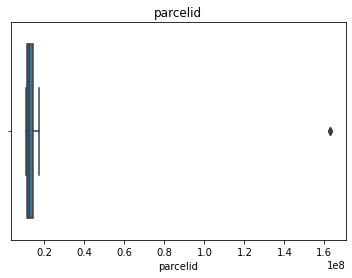

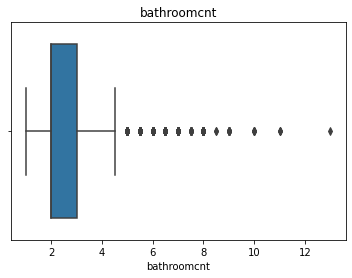

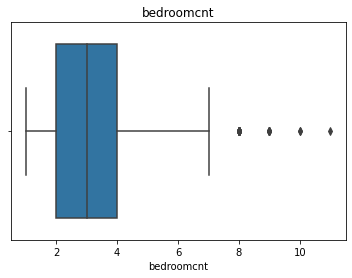

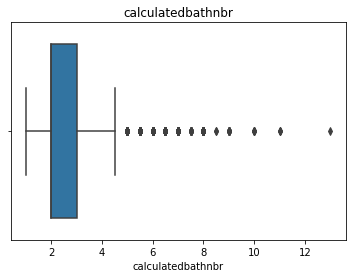

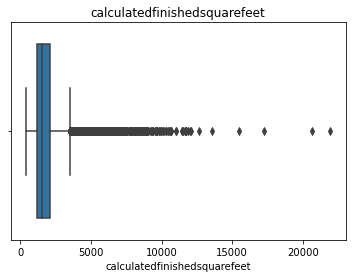

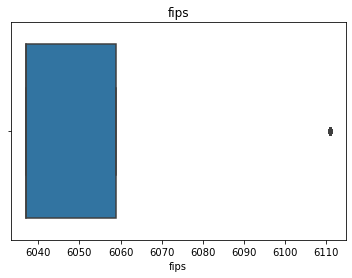

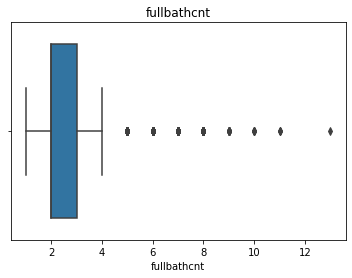

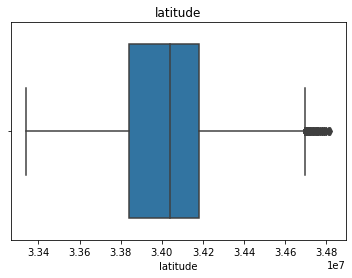

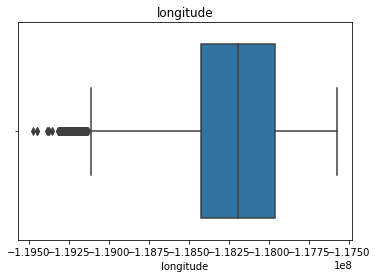

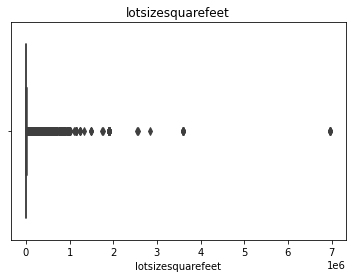

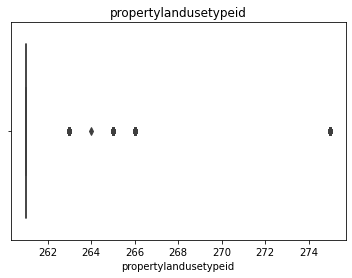

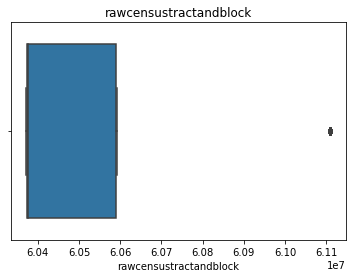

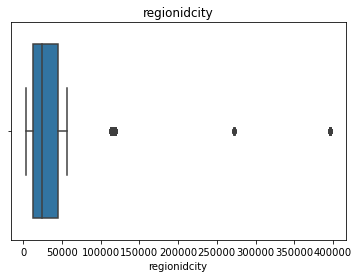

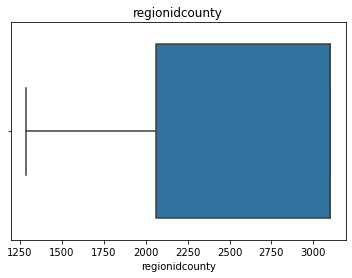

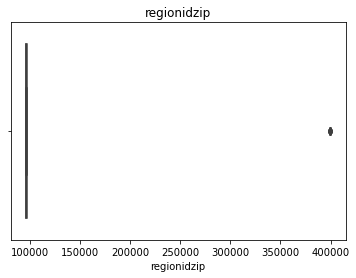

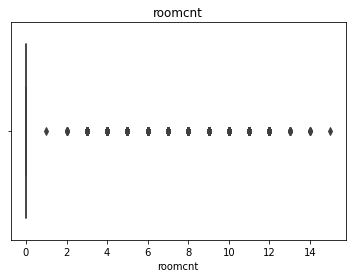

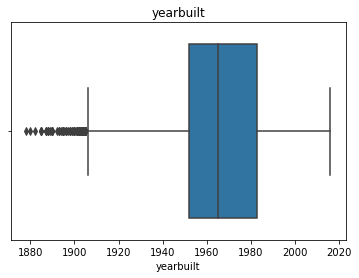

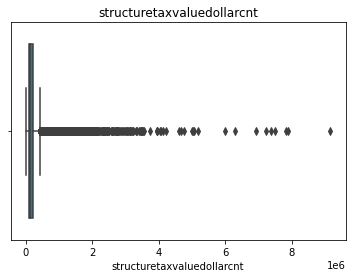

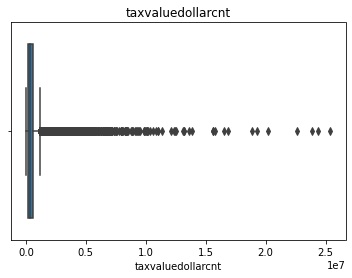

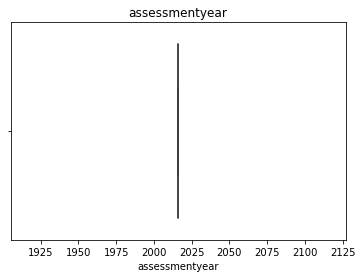

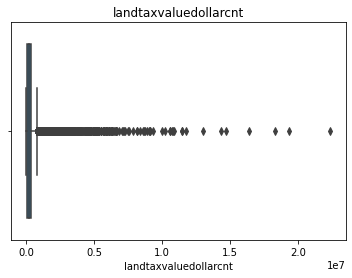

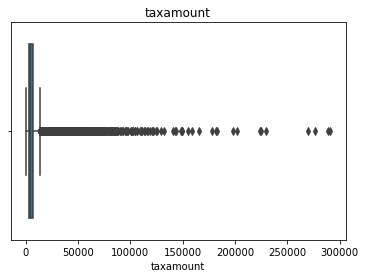

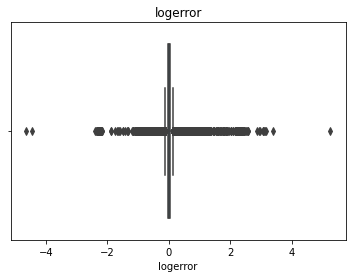

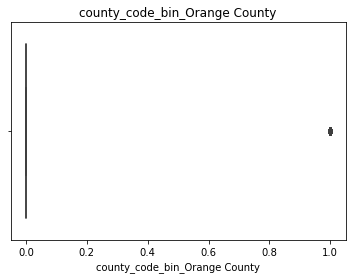

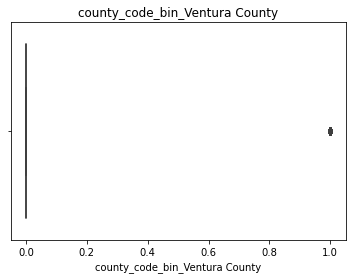

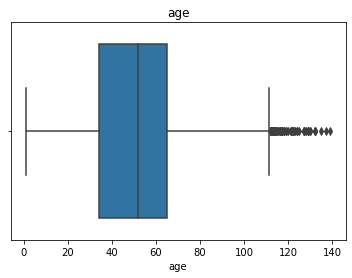

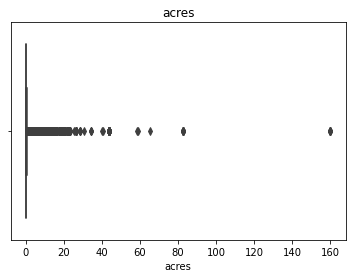

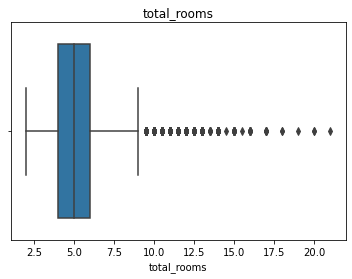

In [23]:
for col in df.select_dtypes('number'):
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

### Observations of univariate visualizations
-
-
-


[(0.0, 2.0)]

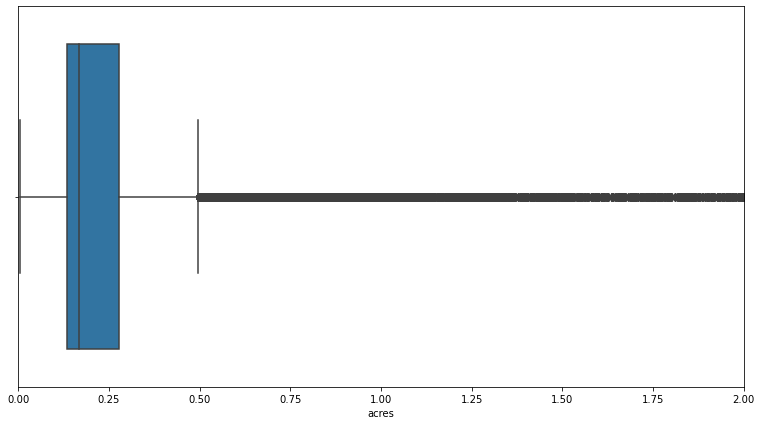

In [24]:
# Set size of figure
plt.figure(figsize = (13,7))
# Create histogram
ax = sns.boxplot(data=df, x= 'acres')
# set x and y limits to 'zoom in'
ax.set(xlim = (0,2)) # set the limits to the desired ones

- Remove extremes in bedrooms and baths, we will keeps homes with between 1 and 7 baths, between 0 and 7 bedrooms

- There is an error in zip, so we will remove those whose zips are invalid numbers (> 99999).

- remove square feet > 10000 for now  # investigate how many properties your outlier limits may impact

- remove lot size > ________ for now

## PREPARE - REMOVE OUTLIERS

In [25]:
'''
def remove_outliers():
    
    remove outliers in bed, bath, zip, lotsizesquarefeet, square feet


    return df[((df.bathroomcnt <= 7) & (df.bedroomcnt <= 7) & 
               (df.regionidzip < 100000) & 
               (df.bathroomcnt > 0) & 
               (df.bedroomcnt > 0) & 
               (df.lotsizesquarefeet < 20000) &
               (df.calculatedfinishedsquarefeet < 10000)
              )]
'''           

'\ndef remove_outliers():\n    \n    remove outliers in bed, bath, zip, lotsizesquarefeet, square feet\n\n\n    return df[((df.bathroomcnt <= 7) & (df.bedroomcnt <= 7) & \n               (df.regionidzip < 100000) & \n               (df.bathroomcnt > 0) & \n               (df.bedroomcnt > 0) & \n               (df.lotsizesquarefeet < 20000) &\n               (df.calculatedfinishedsquarefeet < 10000)\n              )]\n'

In [26]:
'''
df = remove_outliers()

# Now that the most extreme outliers have been removed, let's look at the summary statistics of each numeric field. 
df.describe().T
'''

"\ndf = remove_outliers()\n\n# Now that the most extreme outliers have been removed, let's look at the summary statistics of each numeric field. \ndf.describe().T\n"

In [27]:
df.shape

(62210, 37)

## PREPARE - SPLIT

In [28]:
def split(df, target_var):
    '''
    This function takes in the dataframe and target variable name as arguments and then
    splits the dataframe into train (56%), validate (24%), & test (20%)
    It will return a list containing the following dataframes: train (for exploration), 
    X_train, X_validate, X_test, y_train, y_validate, y_test
    '''
    # split df into train_validate (80%) and test (20%)
    train_validate, test = train_test_split(df, test_size=.20, random_state=13)
    # split train_validate into train(70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    # create X_train by dropping the target variable 
    X_train = train.drop(columns=[target_var])
    # create y_train by keeping only the target variable.
    y_train = train[[target_var]]

    # create X_validate by dropping the target variable 
    X_validate = validate.drop(columns=[target_var])
    # create y_validate by keeping only the target variable.
    y_validate = validate[[target_var]]

    # create X_test by dropping the target variable 
    X_test = test.drop(columns=[target_var])
    # create y_test by keeping only the target variable.
    y_test = test[[target_var]]

    partitions = [train, X_train, X_validate, X_test, y_train, y_validate, y_test]
    return partitions

In [29]:
partitions = split(df, target_var='logerror')

In [30]:
train = partitions[0]
train['logerror_bins'] = pd.cut(train.logerror, [-5, -.2, -.05, .05, .2, 4])
partitions[0] = train

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34837 entries, 44636 to 8151
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   parcelid                        34837 non-null  int64   
 1   bathroomcnt                     34837 non-null  float64 
 2   bedroomcnt                      34837 non-null  float64 
 3   calculatedbathnbr               34837 non-null  float64 
 4   calculatedfinishedsquarefeet    34837 non-null  float64 
 5   fips                            34837 non-null  float64 
 6   fullbathcnt                     34837 non-null  float64 
 7   latitude                        34837 non-null  float64 
 8   longitude                       34837 non-null  float64 
 9   lotsizesquarefeet               34837 non-null  float64 
 10  propertycountylandusecode       34837 non-null  object  
 11  propertylandusetypeid           34837 non-null  float64 
 12  rawcensustracta

In [32]:
train.logerror_bins.value_counts()

(-0.05, 0.05]    22827
(0.05, 0.2]       5625
(-0.2, -0.05]     4162
(0.2, 4.0]        1529
(-5.0, -0.2]       694
Name: logerror_bins, dtype: int64

# EXPLORE

### Explore - Univariate

[(-1.0, 1.0), (0.0, 1500.0)]

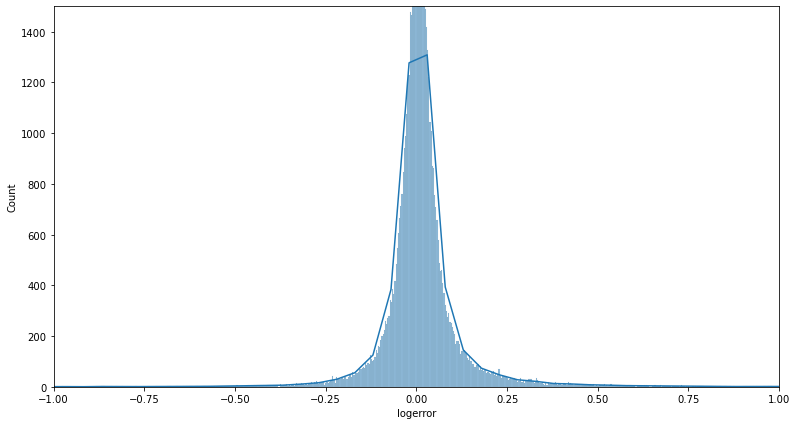

In [33]:
# Set size of figure
plt.figure(figsize = (13,7))
# Create histogram
ax = sns.histplot(data=df, x="logerror", kde=True)
# set x and y limits to 'zoom in'
ax.set(xlim = (-1, 1), ylim = (0, 1500)) # set the limits to the desired ones

[(-1.0, 1.0), (0.0, 1500.0)]

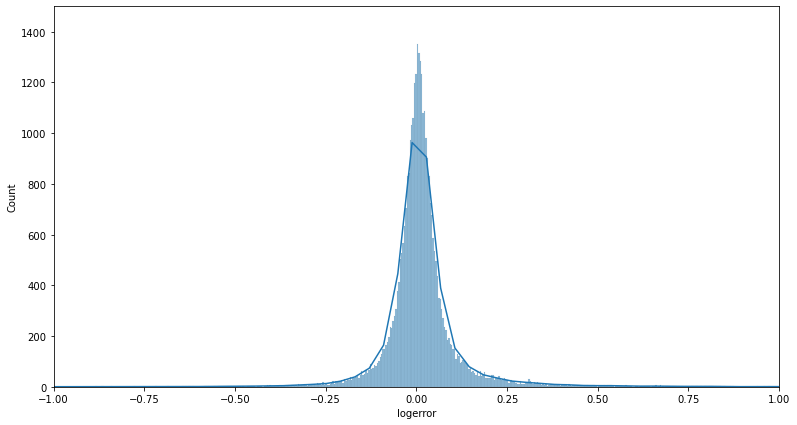

In [34]:
plt.figure(figsize = (13,7))
# Create histogram
ax = sns.histplot(data=train, x="logerror", kde=True)
# set x and y limits to 'zoom in'
ax.set(xlim = (-1, 1), ylim = (0, 1500)) # set the limits to the desired ones

### Observations: 
- Appears as a normal distribution.

### Explore - Bivariate

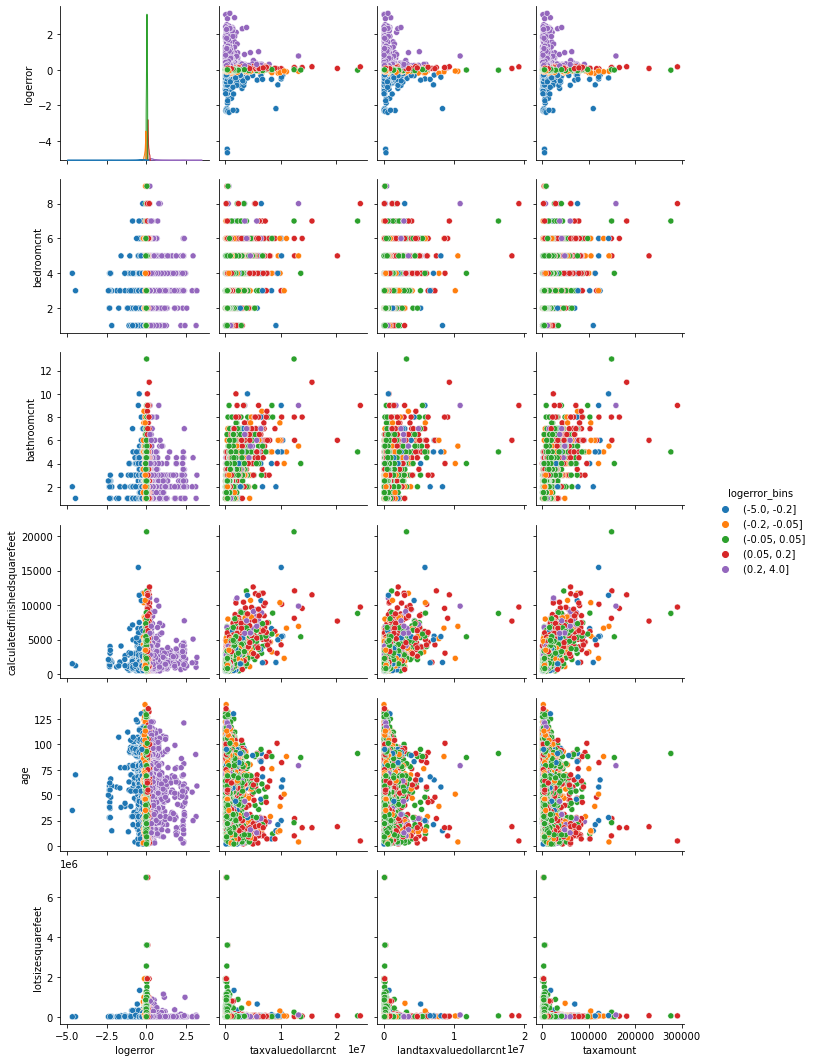

In [35]:
sns.pairplot(data = train, hue = 'logerror_bins', 
             x_vars = ['logerror', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'],
             y_vars = ['logerror', 'bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'age', 'lotsizesquarefeet'])

### Observations:
- logerror higher with odd numbers of bedrooms
- logerror higher when bathrooms have complete number; lower logerror with halfbaths
- logerror higher with calculated squarefeet > 4000
- logerror higher with homes ages between 5 and 80; tend to zillow model tends to overestimate with age
- need to look at lotsize and log error in more detail to see if there is a relationship
- logerror higher with homes that have taxvaluedollarcnt & landtaxvaluedoallarcnt < 500_000, and taxamount < 50_000

Error is greatest for the properties sitting on smaller land. Error is greatest for properties with fewer square feet. Error is greatest for properties with 1 or 2 bathrooms. Error is greatest for locations in the southern to center (S-N) of the county. Error is greatest for locations in the center (W-E) of the county as opposed to on the coastline or far eastern edge. Error is greatest and positive for the lower structure dollar per square feet, indicating the properties tax value is underrepresenting the future sale price. Error is greatest the the lower and more common tax rates. Error is greatest for homes where the number of bathrooms <= number of bedrooms.



## EXPLORE - QUESTIONS

### Questions

- 1. Is there a relationship between logerror and *lot size* in each county?
- 2. Is there a relationship between logerror and finished square footage of the property in each county?
- 3. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
- 4. Is there a relationship between logerror and zipcode?
- 5. Controlling for property square footage, what is the relationship between logerror and age of the home?

### QUESTION 1: 

- 1. Is there a relationship between logerror and *lot size* square footage in each county?

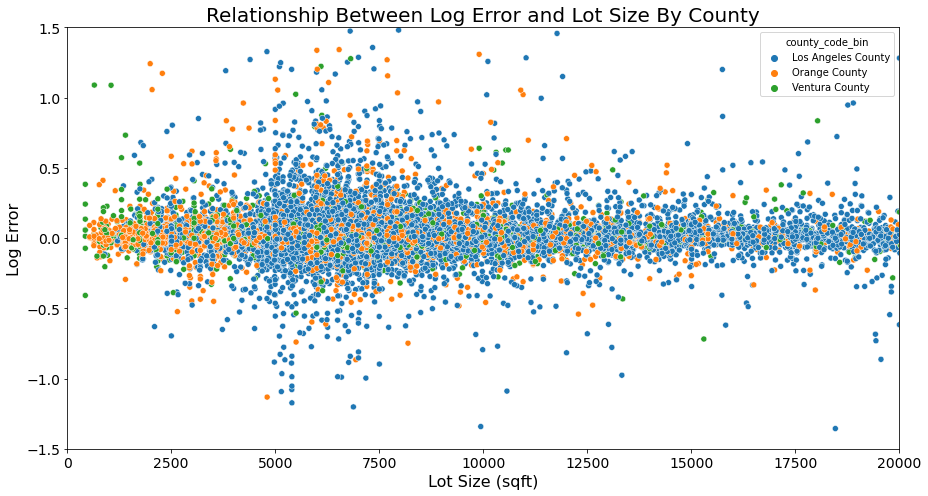

In [36]:
x = train.lotsizesquarefeet
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y, hue="county_code_bin")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, 20000), ylim= (-1.5,1.5)) # set the limits to the desired ones
# fit labels and legend
plt.title('Relationship Between Log Error and Lot Size By County', fontsize = 20)
plt.xlabel('Lot Size (sqft)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

<Figure size 936x504 with 0 Axes>

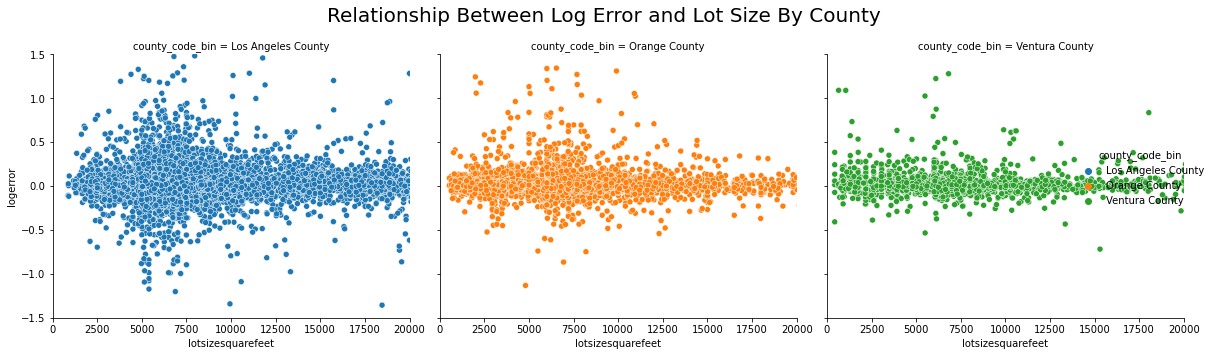

In [37]:
x = train.lotsizesquarefeet
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.relplot(data=train, x= x, y= y, hue="county_code_bin", col="county_code_bin")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, 20000), ylim= (-1.5,1.5)) # set the limits to the desired ones
# fit labels and legend
plt.suptitle('Relationship Between Log Error and Lot Size By County', fontsize = 20)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

#### Observations
- LA County adn Orange County have more log error in homes with a logerror between 3000 - 8000 sqft. 
- Is logerror significntly different for homes with lot sizes between 3000-8000 sqft?

#### Hypothesis Testing - Pearson's R
Pearson's R was used because both lotsize and logerror are continuous variables. 

In [38]:
# H0 - There is no linear relationship between lot size and logerror.
# H1 - There is a linear realtionship between lot size and log error.
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = 0.005357827510080741
p = 0.3173142572533213
We fail to reject the H0.


#### Further testing to obtain correlation between lot size and log error by county.

In [39]:
train.groupby('county_code_bin').apply(lambda subset: stats.pearsonr(subset.lotsizesquarefeet, subset.logerror))

county_code_bin
Los Angeles County     (0.010644074694804155, 0.09852288019742926)
Orange County           (0.007559067200630481, 0.5029798018270082)
Ventura County        (-0.025585237167048726, 0.16896539862386262)
dtype: object

### ANSWER 1.

### Question 2:

- 2. Is there a relationship between logerror and finished square footage of the property in each county?

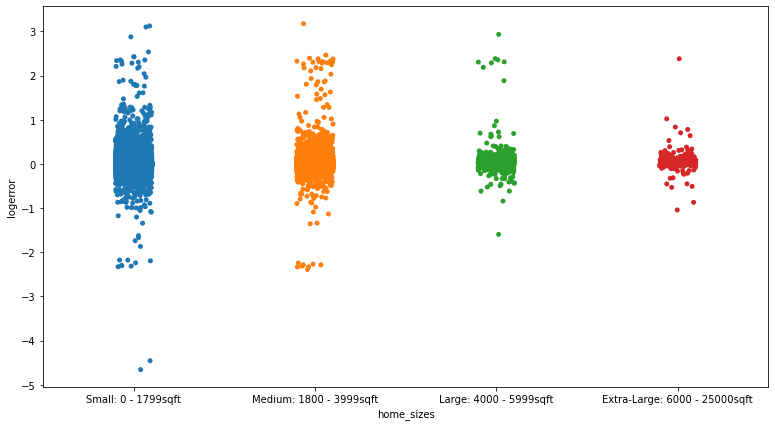

In [40]:
x = train.home_sizes
y = train.logerror
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, data= train.sample(1000))

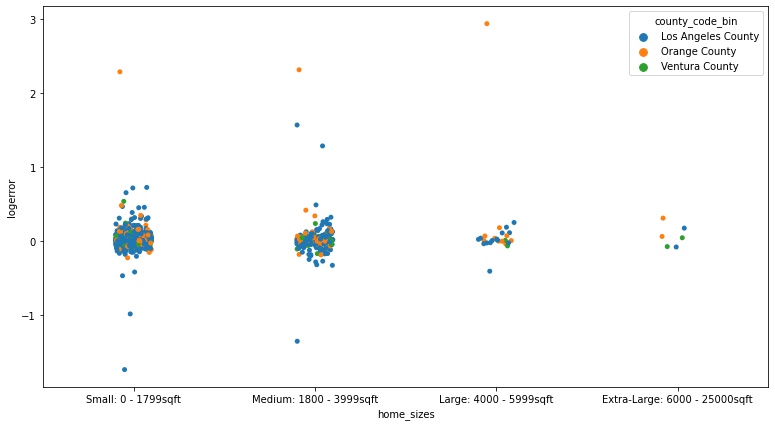

In [41]:
x = 'home_sizes'
y = 'logerror'
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, hue='county_code_bin', data= train.sample(1000))

#### Hypothesis Testing - 1-Tailed, 1-Sample T-Test - Mean of Subgroup vs. Mean of Overall
T-Test was used to compare the mean of logerror of a sample against the mean logerror overall

- H$_{0}$: Mean of logerror in houses of less than 4000 square feet <= Mean logerror of all home sizes
- H$_{a}$: Mean of logerror in houses of less than 4000 square feet  > Mean logerror of all home sizes

In [43]:
alpha = 0.05
logerror_small_med= train[(train.home_sizes.str.startswith('Small'))| (train.home_sizes.str.startswith('Medium'))].logerror
overall_mean = train.logerror.mean()
t, p = stats.ttest_1samp(logerror_small_med, overall_mean)

print(t, p/2, alpha)

if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject the null hypothesis.")
else:
    print("We reject the null hypothesis.")

-1.3799897011104276 0.0837994760747638 0.05
We fail to reject the null hypothesis.


- 3. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

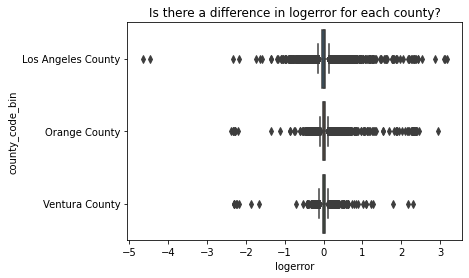

In [45]:
sns.boxplot(train.logerror, train.county_code_bin)
plt.title("Is there a difference in logerror for each county?")
plt.show()

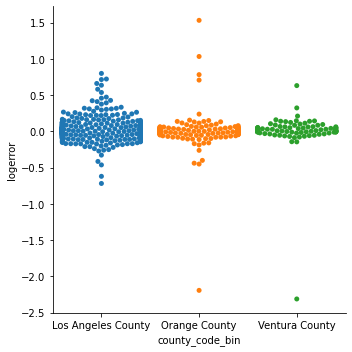

In [46]:
x= 'county_code_bin'
y = 'logerror'
sns.catplot(x=x, y=y, data= train.sample(1000), kind='swarm')

### Observations
 - Los Angeles County has a wider variance, followed by Orange County then Ventura. 

- 4. Is there a relationship between logerror and zipcode?

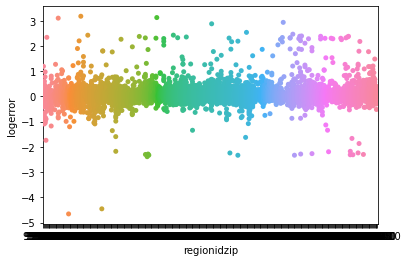

In [47]:
x= 'regionidzip'
y = 'logerror'
ax = sns.stripplot(x=x, y=y, data= train)

In [48]:
# catplot strip....based upon observation use hue or col to bring other feature into view

- 5. Controlling for property square footage, what is the relationship between logerror and age of the home?

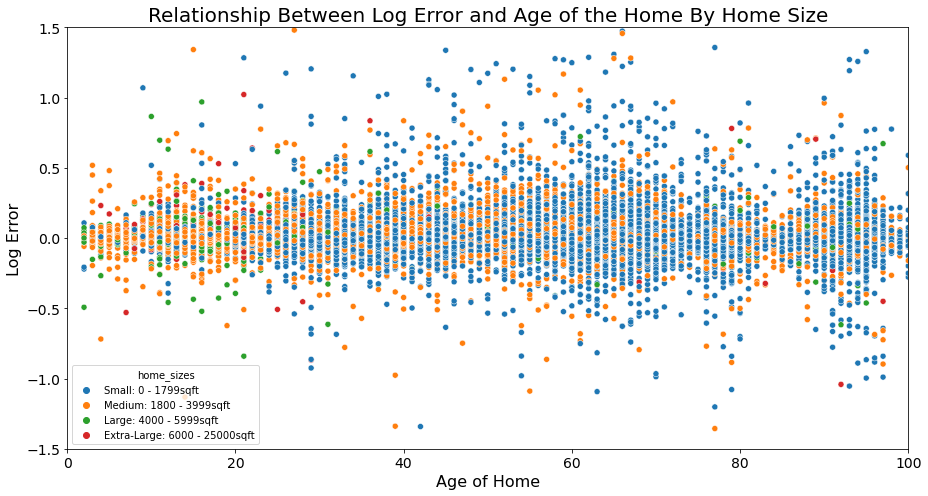

In [49]:
x = train.age
y = train.logerror

# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y, hue="home_sizes")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, 100), ylim= (-1.5,1.5)) # set the limits to the desired ones
# fit labels and legend
plt.title('Relationship Between Log Error and Age of the Home By Home Size', fontsize = 20)
plt.xlabel('Age of Home', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

<Figure size 936x504 with 0 Axes>

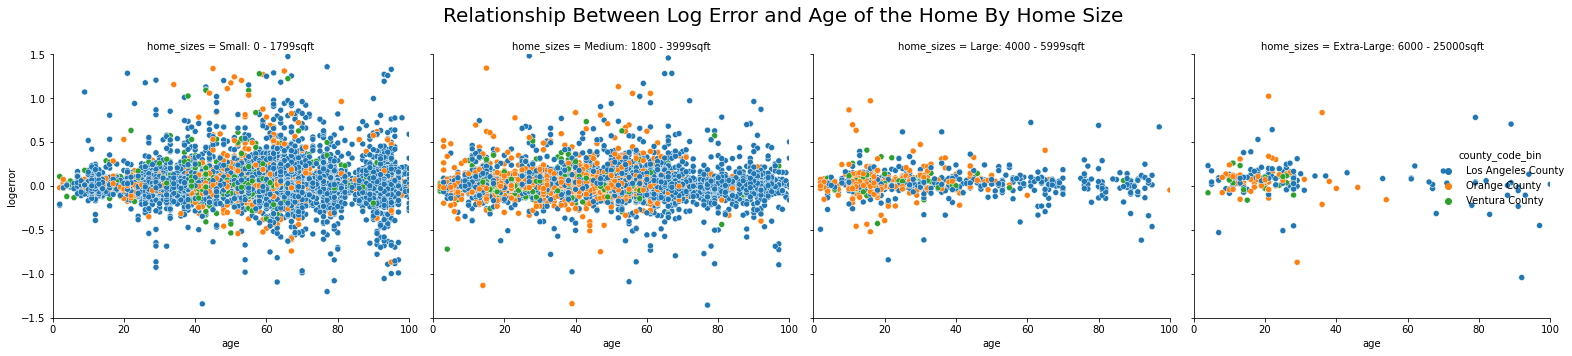

In [50]:
x = train.age
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.relplot(data=train, x= x, y= y, hue="county_code_bin", col="home_sizes")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, 100), ylim= (-1.5,1.5)) # set the limits to the desired ones
# fit labels and legend
plt.suptitle('Relationship Between Log Error and Age of the Home By Home Size', fontsize = 20)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

### Observations
- Log error for small and medium sized homes (400 - 3900 sqft) is significantly more than large and extra large homes, particulalry when a home is over 40 years old. 

### Question 6:

Is there a realtionship between logerror and acres?

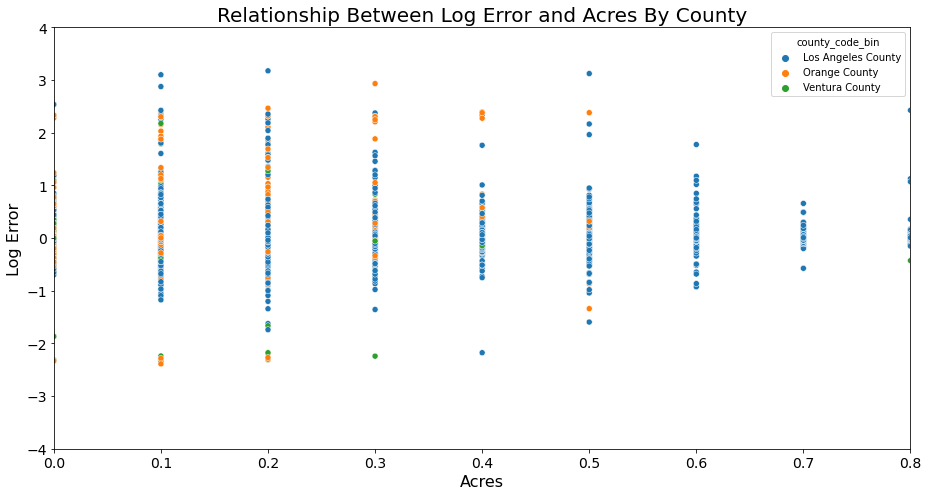

In [51]:
x = train.acres_bin
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y, hue="county_code_bin")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, .8), ylim= (-4,4)) # set the limits to the desired ones
# fit labels and legend
plt.title('Relationship Between Log Error and Acres By County', fontsize = 20)
plt.xlabel('Acres', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

<Figure size 936x504 with 0 Axes>

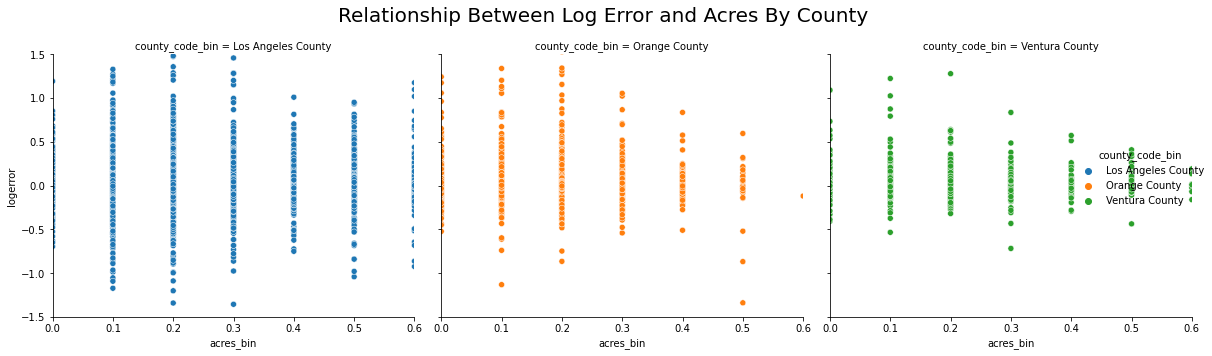

In [52]:
x = train.acres_bin
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.relplot(data=train, x= x, y= y, hue="county_code_bin", col="county_code_bin")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, 0.6), ylim= (-1.5,1.5)) # set the limits to the desired ones
# fit labels and legend
plt.suptitle('Relationship Between Log Error and Acres By County', fontsize = 20)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

## Scale the Data

In [62]:
# the variables that still need scaling
scaled_vars = ['age', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'total_rooms', 'bathroomcnt', 'bedroomcnt']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]
scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])


def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])

In [64]:
X[1].head().T

,36431,63092,10062,52400,16067
parcelid,12136238,17104286,12330211,11578479,11638887
bathroomcnt,3.00,3.00,4.00,3.00,8.00
bedroomcnt,3.00,3.00,5.00,2.00,7.00
calculatedbathnbr,3.00,3.00,4.00,3.00,8.00
calculatedfinishedsquarefeet,"2,051.00","2,756.00","2,597.00","1,478.00","9,200.00"
fips,"6,037.00","6,111.00","6,037.00","6,037.00","6,037.00"
fullbathcnt,3.00,3.00,4.00,3.00,8.00
latitude,"34,137,066.00","34,246,731.00","33,955,398.00","34,034,192.00","34,075,996.00"
longitude,"-118,028,329.00","-119,073,589.00","-118,141,862.00","-118,487,907.00","-118,417,735.00"
lotsizesquarefeet,"15,853.00","20,140.00","7,983.00","16,020.00","21,983.00"


## Clustering

In [54]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df


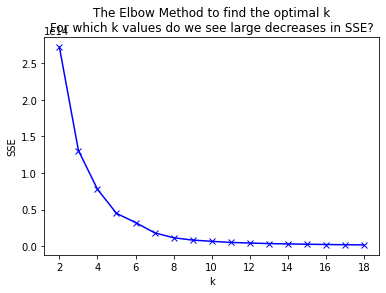

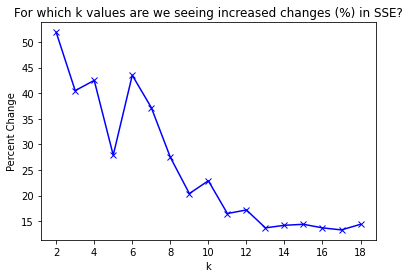

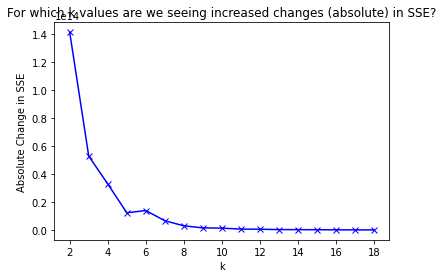

,k,sse,delta,pct_delta
0,2,"271,962,839,298,353.91","141,235,653,785,389.00",51.90
1,3,"130,727,185,512,965.06","52,904,591,149,959.00",40.50
2,4,"77,822,594,363,005.58","33,046,685,335,236.00",42.50
3,5,"44,775,909,027,769.59","12,478,288,862,111.00",27.90
4,6,"32,297,620,165,659.04","14,052,516,453,942.00",43.50
5,7,"18,245,103,711,717.22","6,793,478,855,754.00",37.20
6,8,"11,451,624,855,963.05","3,153,054,257,771.00",27.50
7,9,"8,298,570,598,191.70","1,691,992,328,750.00",20.40
8,10,"6,606,578,269,441.27","1,510,242,133,377.00",22.90
9,11,"5,096,336,136,064.62","839,531,137,884.00",16.50


In [55]:
# list of variables I will cluster on. 
cluster_vars = ['age', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'total_rooms', 'bathroomcnt', 'bedroomcnt']
cluster_name = 'size_cluster'
k_range = range(2,20)

find_k(X[0], cluster_vars, k_range)

In [56]:
# create clusters
k = 6
# as reminders: 
cluster_vars = [['age', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'total_rooms', 'bathroomcnt', 'bedroomcnt']]
cluster_name = 'age_size_cluster'

In [ ]:
# create k-means object
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans

In [ ]:
kmeans = create_clusters(X[0], k, cluster_vars)

In [ ]:
#  Get centroids of each cluster for each variable.

In [ ]:
# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

In [ ]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

In [ ]:
# label cluster for each observation in X_train (X[0] in our X list of dataframes), 
# X_validate (X[1]), & X_test (X[2])

def assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df):
    for i in range(len(X)):
        clusters = pd.DataFrame(kmeans.predict(X[i][cluster_vars]), 
                            columns=[cluster_name], index=X[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        X[i] = pd.concat([X[i], clusters_centroids], axis=1)
    return X

In [ ]:
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)

In [ ]:
pd.DataFrame(X[0].groupby(['area_cluster', 'centroid_scaled_latitude', 'centroid_scaled_longitude', 
                           'centroid_age_bin'])['area_cluster'].count())

## MODELING